In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="ipykernel",
    message="SettingWithCopyWarning"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
print(data.describe())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521
       Unnamed: 0      TV   Radio  Newspaper   Sales
count     200.000 200.000 200.000    200.000 200.000
mean      100.500 147.042  23.264     30.554  14.023
std        57.879  85.854  14.847     21.779   5.217
min         1.000   0.700   0.000      0.300   1.600
25%        50.750  74.375   9.975     12.750  10.375
50%       100.500 149.750  22.900     25.750  12.900
75%       150.250 218.825  36.525     45.100  17.400
max       200.000 296.400  49.600    114.000  27.000


In [3]:
data[data['Sales'] < 5]
# remove outliers 1.6 and 3.2

,Unnamed: 0,TV,Radio,Newspaper,Sales
8,9,8.600,2.100,1.000,4.800
130,131,0.700,39.600,8.700,1.600
155,156,4.100,11.600,5.700,3.200


In [4]:
data[data['Sales'] > 25]
# these don't seem reasonably close

,Unnamed: 0,TV,Radio,Newspaper,Sales
36,37,266.900,43.800,5.000,25.400
98,99,289.700,42.300,51.200,25.400
147,148,243.200,49.000,44.300,25.400
175,176,276.900,48.900,41.800,27.000
183,184,287.600,43.000,71.800,26.200
198,199,283.600,42.000,66.200,25.500


In [5]:
# remove outliers from dependent variable to reduce bad predictions due to skewed observations
data2 = data[data['Sales'] > 4]
data2.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,198.000,198.000,198.000,198.000,198.000
mean,100.066,148.504,23.240,30.790,14.140
std,57.995,85.037,14.853,21.760,5.109
min,1.000,5.400,0.000,0.300,4.800
25%,50.250,75.150,9.925,12.950,10.425
50%,99.500,150.650,22.900,26.050,12.900
75%,149.750,219.475,36.450,45.100,17.400
max,200.000,296.400,49.600,114.000,27.000


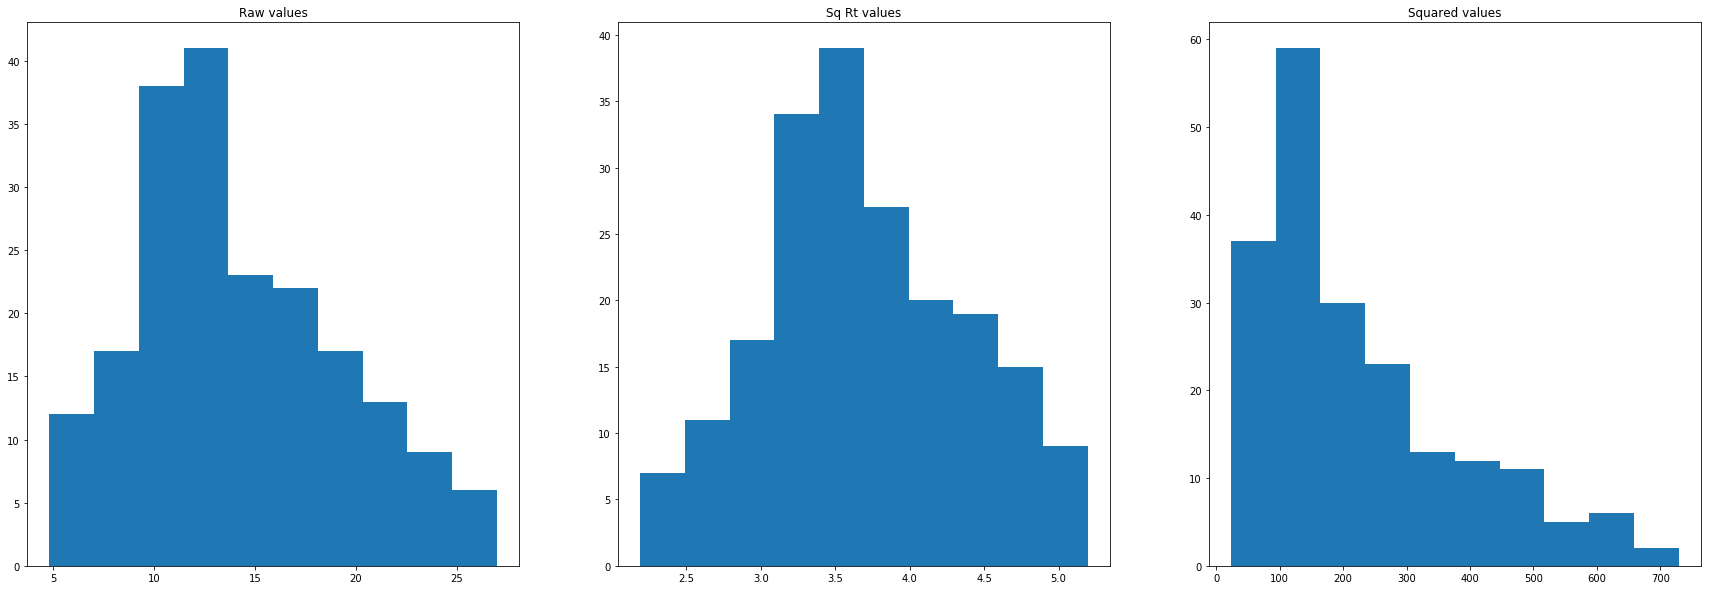

In [6]:
# Move dependent variable closer to normal distribution
adjust = [math.sqrt(x) for x in  data2['Sales']]
sq_sales = data2['Sales'] ** 2

plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.hist(data2['Sales'])
plt.title('Raw values')
plt.subplot(1, 3, 2)
plt.hist(adjust)
plt.title('Sq Rt values')
plt.subplot(1, 3, 3)
plt.hist(sq_sales)
plt.title('Squared values')
plt.show()
#  skew is toward higher values, so sqrt brings closer to normal, although square brings close to lognormal

In [7]:
# add some features
# create proportional view of independents
data2['pTV'] = 0
data2['pNews'] = 0
data2['pRad'] = 0
data2['tvsum'] = data2['TV'].sum()
data2['newsum'] = data2['Newspaper'].sum()
data2['radsum'] = data2['Radio'].sum()
data2['pTV'] = data2['TV'] / data2['tvsum']
data2['pNews'] = data2['Newspaper'] / data2['newsum']
data2['pRad'] = data2['Radio'] / data2['radsum']
# Combine 2 independents
data2['tv_rad'] = data2['TV'] + data2['Radio']
data2['tv_news'] = data2['TV'] + data2['Newspaper']
data2['news_rad'] = data2['Newspaper'] + data2['Radio']
# Reciprocal for TV
data2['tv_recip'] = 1 / data2['TV']
# Reciprocal for TV with others
data2['tvr_rad'] = data2['tv_recip'] + data2['Radio']
data2['tvr_news'] = data2['tv_recip'] + data2['Newspaper']
data2

c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value 

,Unnamed: 0,TV,Radio,Newspaper,Sales,pTV,pNews,pRad,tvsum,newsum,radsum,tv_rad,tv_news,news_rad,tv_recip,tvr_rad,tvr_news
0,1,230.100,37.800,69.200,22.100,0.008,0.011,0.008,29403.700,6096.400,4601.600,267.900,299.300,107.000,0.004,37.804,69.204
1,2,44.500,39.300,45.100,10.400,0.002,0.007,0.009,29403.700,6096.400,4601.600,83.800,89.600,84.400,0.022,39.322,45.122
2,3,17.200,45.900,69.300,9.300,0.001,0.011,0.010,29403.700,6096.400,4601.600,63.100,86.500,115.200,0.058,45.958,69.358
3,4,151.500,41.300,58.500,18.500,0.005,0.010,0.009,29403.700,6096.400,4601.600,192.800,210.000,99.800,0.007,41.307,58.507
4,5,180.800,10.800,58.400,12.900,0.006,0.010,0.002,29403.700,6096.400,4601.600,191.600,239.200,69.200,0.006,10.806,58.406
5,6,8.700,48.900,75.000,7.200,0.000,0.012,0.011,29403.700,6096.400,4601.600,57.600,83.700,123.900,0.115,49.015,75.115
6,7,57.500,32.800,23.500,11.800,0.002,0.004,0.007,29403.700,6096.400,4601.600,90.300,81.000,56.300,0.017,32.817,23.517
7,8,120.200,19.600,11.600,13.200,0.004,0.002,0.004,29403.700,6096.400,4601.600,139.800,131.800,31.200,0.008,19.608,11.608
8,9,8.600,2.100,1.000,4.800,0.000,0.000,0.000,29403.700,6096.400,4601.600,10.700,9.600,3.100,0.116,2.216,1.116
9,10,199.800,2.600,21.200,10.600,0.007,0.003,0.001,29403.700,6096.400,4601.600,202.400,221.000,23.800,0.005,2.605,21.205


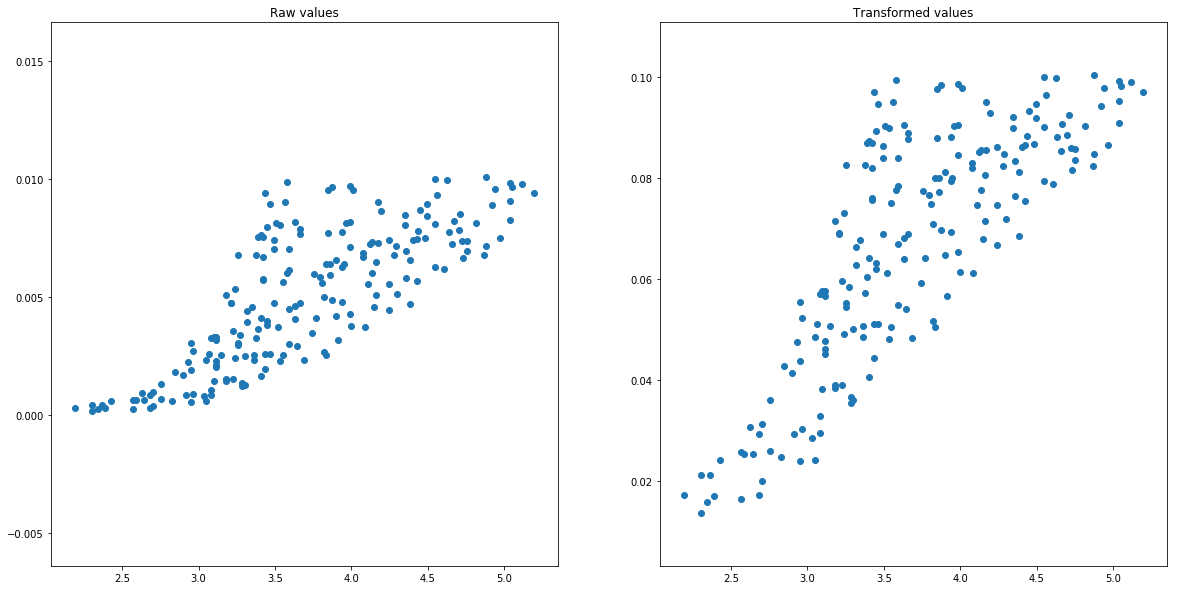

In [8]:
# Compare features - TV
outcome = adjust
feature = data2['pTV']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

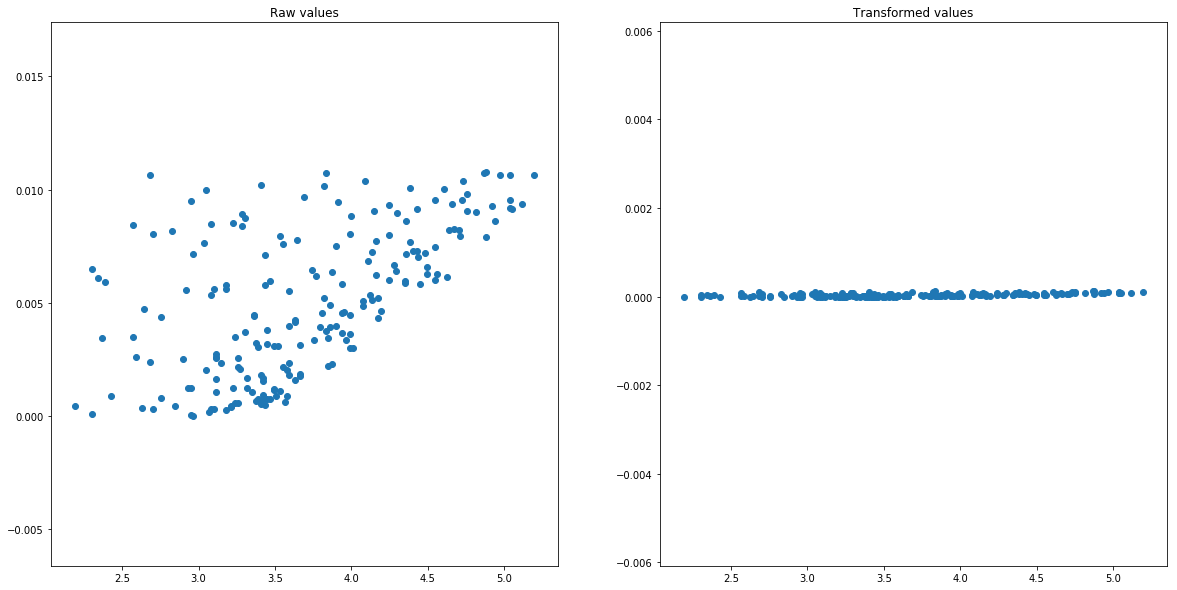

In [9]:
# Compare features - Radio
outcome = adjust
feature = data2['pRad']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sq_feature)
plt.title('Transformed values')
plt.show()

# This is almost a straight-line 

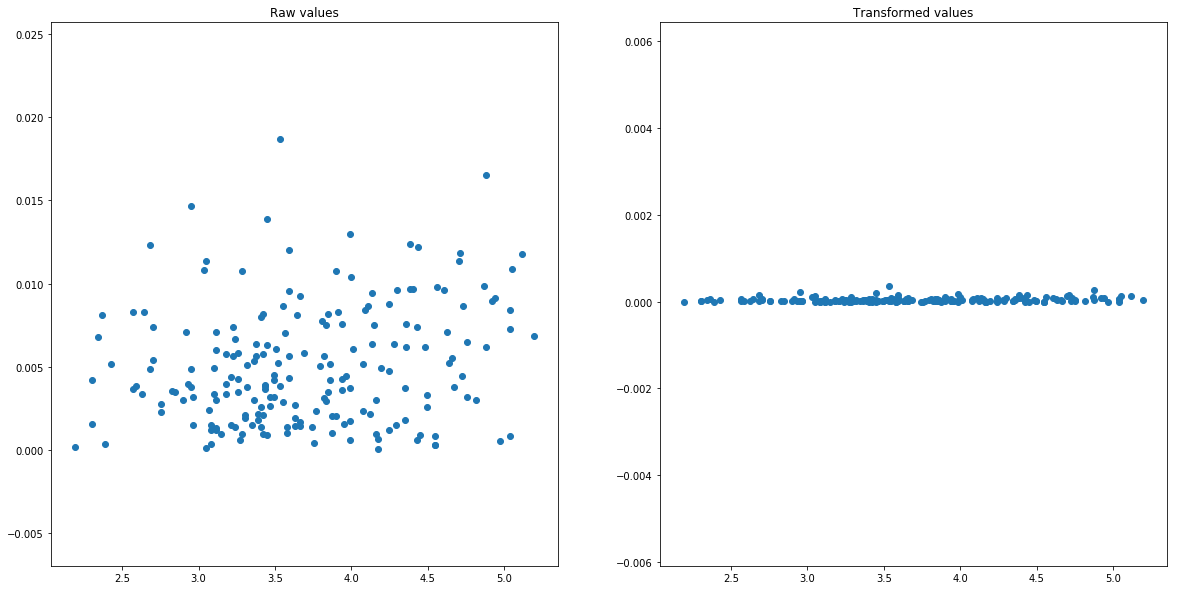

In [10]:
# Compare features - Newspaper
outcome = adjust
feature = data2['pNews']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sq_feature)
plt.title('Transformed values')
plt.show()

# This is almost a straight-line 

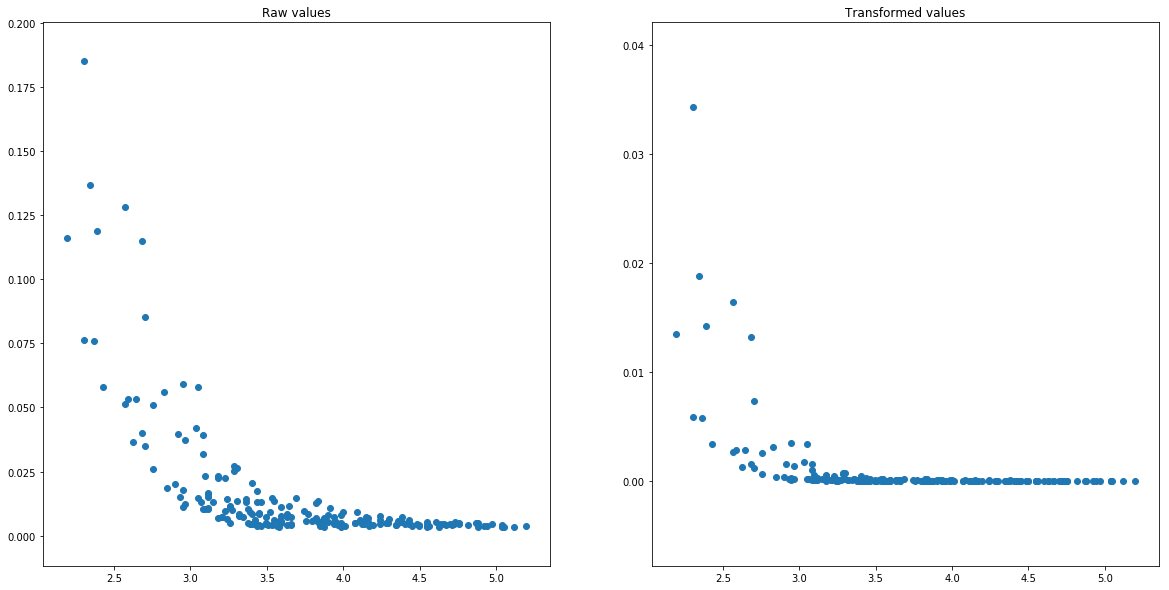

In [11]:
# Compare features - TV (reciprocal)
outcome = adjust
feature = data2['tv_recip']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sq_feature)
plt.title('Transformed values')
plt.show()

# has more of a log distribution

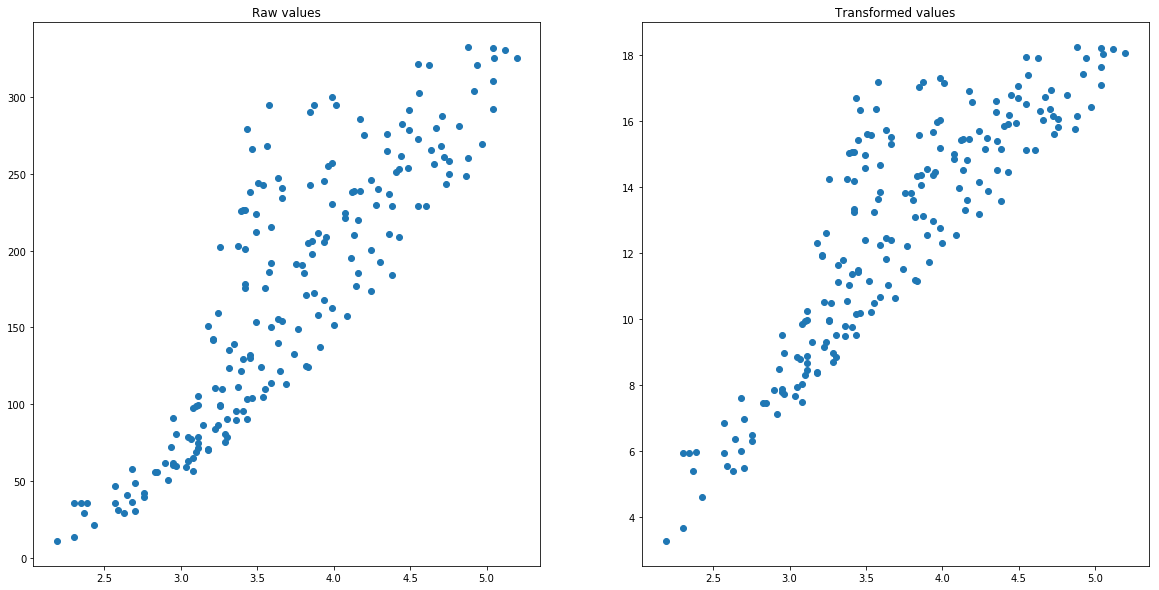

In [12]:
# Compare combined features - TV & rad
outcome = adjust
feature = data2['tv_rad']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

#  Still pretty skewed

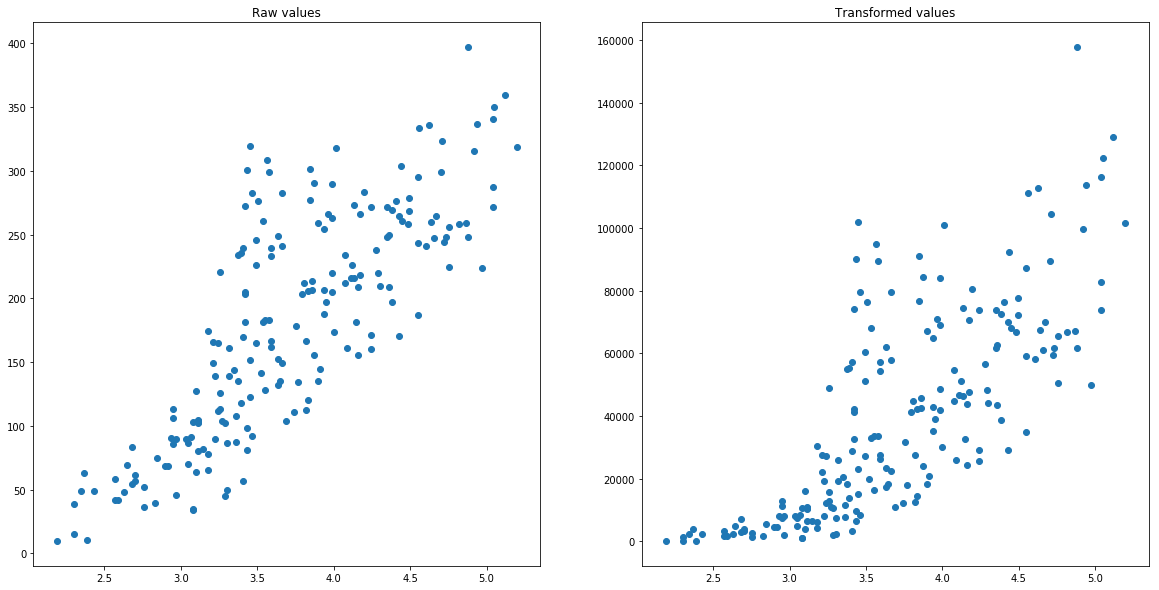

In [13]:
# Compare combined features - TV & news
outcome = adjust
feature = data2['tv_news']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sq_feature)
plt.title('Transformed values')
plt.show()

#  Still pretty skewed

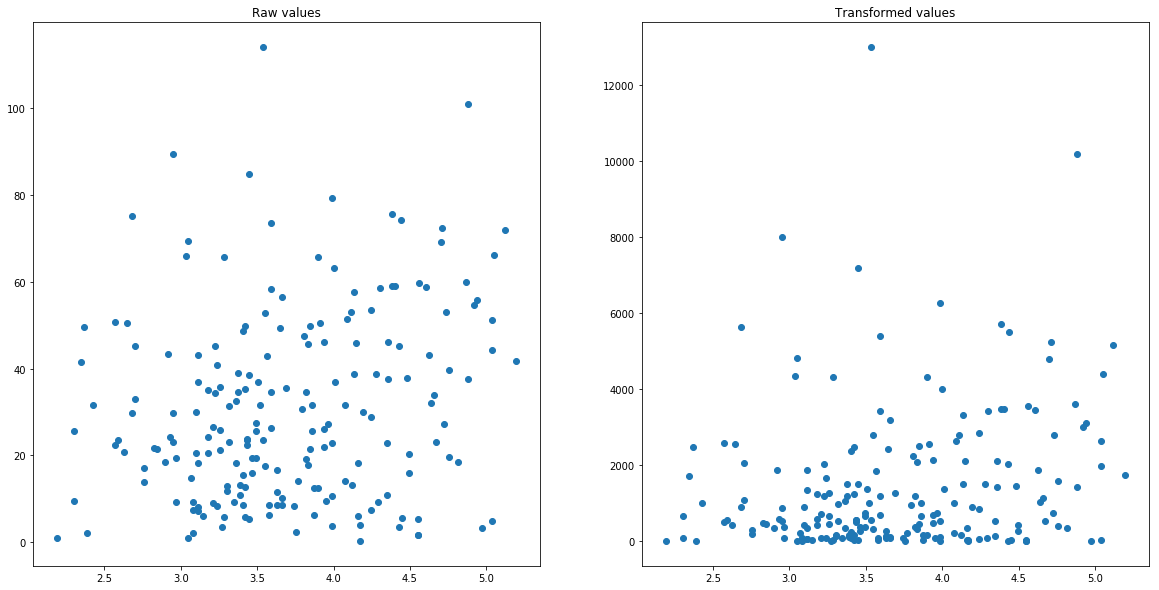

In [14]:
# Compare combined features for reciprocal - TV & news
outcome = adjust
feature = data2['tvr_news']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sq_feature)
plt.title('Transformed values')
plt.show()

#  Definitely not an improvement

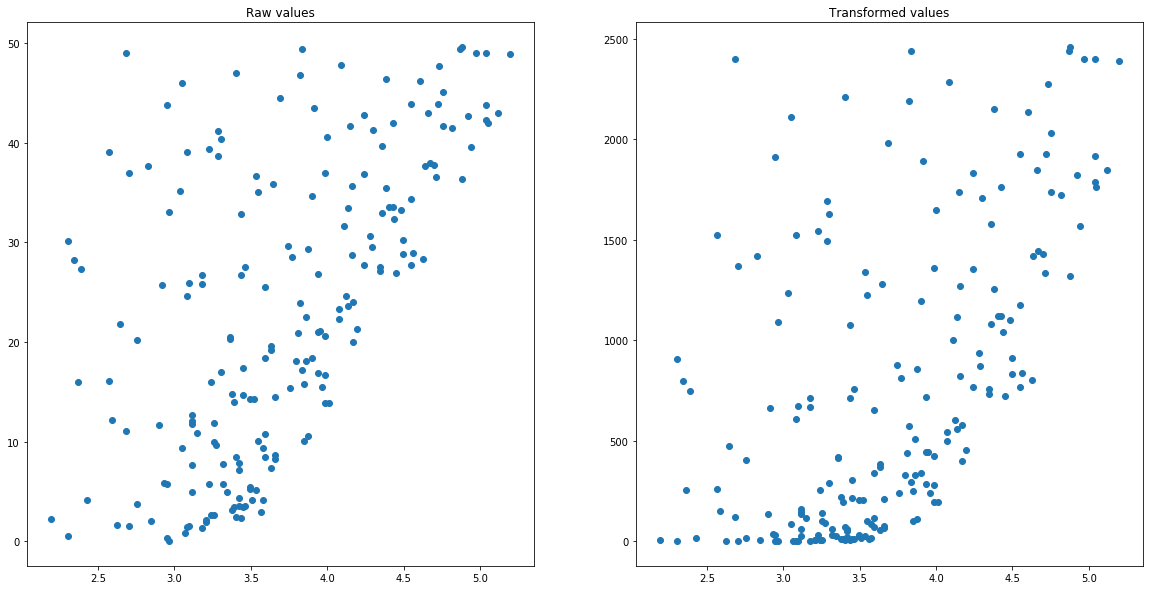

In [15]:
# Compare combined features for reciprocal - TV & radio
outcome = adjust
feature = data2['tvr_rad']

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]
sq_feature = [x ** 2 for x in feature]

# Compare the adjustment to the original
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.subplot(1, 2, 2)
plt.scatter(outcome, sq_feature)
plt.title('Transformed values')
plt.show()

#  Definitely doesn't help

In [16]:
# Selected features for further evaluation:
# reciprocal for tv ads (tv_recip); for radio and newspaper, will use scaled proportion - all squared

data2['pRad_sq'] = data2['pRad'] ** 2
data2['pNews_sq'] = data2['pNews'] ** 2
data2['tv_recip_sq'] = data2['tv_recip'] ** 2


c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

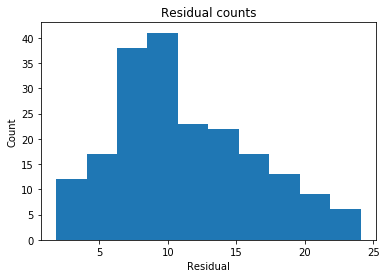

In [20]:
# multivariate normality
X = data2[['tv_recip_sq','pRad_sq','pNews_sq']]
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data2['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

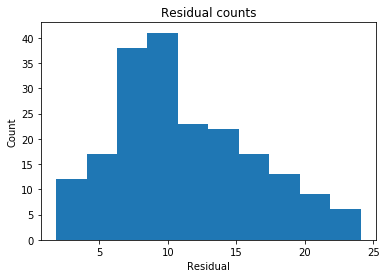

In [25]:
# multivariate normality
X = data2[['tv_recip_sq','pRad_sq','pNews_sq']]
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data2['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

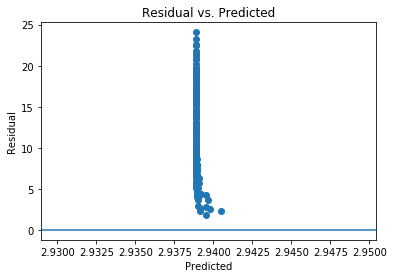

In [26]:
# homoscedasticity
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
